In [19]:
import pandas as pd
from PIL import Image
import imageio
import numpy as np
import os
import re
from random import shuffle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

In [20]:
labels=pd.read_csv("./dog-breed-identification/labels.csv")

In [21]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [22]:
labels_dic=dict(zip(labels['id'],labels['breed']))

In [23]:
labels_dic['84accc2dc9f5bb3ebee89fe1bf23639c']

'kuvasz'

In [24]:
os.listdir('./dog-breed-identification/train')

['84accc2dc9f5bb3ebee89fe1bf23639c.jpg',
 '6f9bac41b5be5ee6baecc9e7ef8f2c2a.jpg',
 '64dd586a1d08937d20618233df2e5dbc.jpg',
 '2c1b06c76751d8b9f9ff943cd693cfca.jpg',
 '114524d11fe49af5be43897233a4f65e.jpg',
 'efec2f66576df7aa036d77ad1fafc8bf.jpg',
 'eecab13ff6ae86429d808115d161d455.jpg',
 '30d54cbd3a88a8473ade8028cd1f2378.jpg',
 '08098e0a4074f62169ab53f7efe40da2.jpg',
 'ee6712eed8607d6d5efd13276dcd1056.jpg',
 '998a01cafea7ff6d709f967e65e50ede.jpg',
 '7ff4b2ca80d0de43727ddf4c907980f0.jpg',
 '365020fbc3a02a725b3a682ef6899673.jpg',
 'e86acb593c6718489134a45e8b936b90.jpg',
 '3322c459d355e77e659cdee729c33aa4.jpg',
 '20963bd7d0202c45005f5f0a052858a5.jpg',
 'd9051c00e8c0436e6055f77d845b64a9.jpg',
 '9d59793a5c249214baf030d2f6cf107b.jpg',
 '677e92cc6f0709e775cf18fbf6f5af66.jpg',
 'a801bed4876123334ec0514da4642b50.jpg',
 'a7b2a87a394fd17c848d2bf21cb7fe59.jpg',
 '7ac30588c07dc4ea1c8315fe9e4ee993.jpg',
 '8d0f47344bd67acf7ca366190aac064e.jpg',
 '4ae0622f7637ed62d3276bdc3bb267fa.jpg',
 'dabf6f388c1122

In [25]:
counting_dict={}
breeds_set=set(labels_dic.values())
for b in breeds_set:
    counting_dict[b]=0

In [26]:
breeds_set

{'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [27]:
# re.sub("(_\d{1,3})",'','welsh_springer_spaniel_054')

In [28]:
for img in os.listdir('./dog-breed-identification/train'):
    if(".DS_Store" not in img):
        img_id=str(img).split('.')[0]
        img_breed=labels_dic[img_id]
        counting_dict[img_breed]+=1
        img_path=os.path.join("./dog-breed-identification/train",img)
        img_data=np.array(Image.open(img_path))
        new_nm="./dog-breed-identification/labeled_train/"+img_breed+"_"+str(counting_dict[img_breed])+".jpg"
        imageio.imwrite(new_nm, img_data)

In [29]:
# os.chdir("/Users/nkamal2/Documents/DL/cnn/dogs_breed_class")

In [30]:
DIR="./dog-breed-identification/labeled_train/"

In [31]:
def get_size_stats(DIR):
    heights=[]
    widths=[]
    img_cnt=0
    for img in os.listdir(DIR):
        path=os.path.join("./dog-breed-identification/labeled_train",img)
        if "DS_Store" not in path:
            data=np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
    avg_ht=sum(heights)/len(heights)
    avg_wd=sum(widths)/len(widths)
    print("avg height%f"%avg_ht)
    print("max height %d min height %d"%(max(heights),min(heights)))
    print("avg width%f"%avg_ht)
    print("max width %d min width %d"%(max(widths),min(widths)))

In [32]:
get_size_stats(DIR)

avg height386.444663
max height 2562 min height 102
avg width386.444663
max width 3264 min width 97


In [33]:
os.listdir(DIR)

['pug_52.jpg',
 'staffordshire_bullterrier_42.jpg',
 'pembroke_52.jpg',
 'norwegian_elkhound_76.jpg',
 'sealyham_terrier_58.jpg',
 'rottweiler_15.jpg',
 'tibetan_terrier_82.jpg',
 'tibetan_mastiff_30.jpg',
 'welsh_springer_spaniel_60.jpg',
 'irish_terrier_58.jpg',
 'tibetan_mastiff_24.jpg',
 'malamute_63.jpg',
 'dingo_4.jpg',
 'affenpinscher_48.jpg',
 'norwegian_elkhound_62.jpg',
 'pembroke_46.jpg',
 'pug_46.jpg',
 'staffordshire_bullterrier_56.jpg',
 'leonberg_85.jpg',
 'sealyham_terrier_64.jpg',
 'afghan_hound_98.jpg',
 'rottweiler_29.jpg',
 'affenpinscher_60.jpg',
 'maltese_dog_4.jpg',
 'welsh_springer_spaniel_48.jpg',
 'irish_terrier_64.jpg',
 'tibetan_mastiff_18.jpg',
 'saint_bernard_2.jpg',
 'soft-coated_wheaten_terrier_13.jpg',
 'pekinese_62.jpg',
 'sealyham_terrier_70.jpg',
 'vizsla_38.jpg',
 'afghan_hound_67.jpg',
 'chow_76.jpg',
 'pomeranian_59.jpg',
 'kelpie_44.jpg',
 'tibetan_terrier_41.jpg',
 'kelpie_50.jpg',
 'clumber_19.jpg',
 'tibetan_terrier_55.jpg',
 'west_highland_wh

In [34]:
def label_img(name):
    label_arr=[0]*120
#     word_label = name.split('.')[0]
    word_label=re.sub("(_\d{1,3}.jpg)",'',name)
    breeds_lst=list(breeds_set)
    ind=breeds_lst.index(word_label)
    label_arr[ind]=1
    return(np.array(label_arr))
#     if word_label == 'wire-haired_fox_terrier' : return np.array([1, 0])
#     elif word_label == 'chesapeake_bay_retriever' : return np.array([0, 1])

In [36]:
IMG_SIZE=300
def load_training_data(DIR):
    train_data=[]
    for img in os.listdir(DIR):
        label=label_img(img)
        path=os.path.join(DIR,img)
        if "DS_Store" not in path:
            img=Image.open(path)
            img=img.convert('L')
            img=img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
            train_data.append([np.array(img),label])
            #data augment
            flip_img=Image.open(path)
            flip_img=flip_img.convert('L')
            flip_img=flip_img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
            flip_img=np.array(flip_img)
            flip_img=np.fliplr(flip_img)
            train_data.append([flip_img,label])
    shuffle(train_data)
    return(train_data)
        

In [37]:
train_data = load_training_data(DIR)
plt.imshow(train_data[43][0], cmap = 'gist_gray')

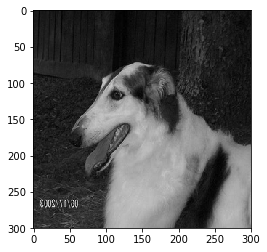

In [43]:
im=plt.imshow(train_data[600][0], cmap = 'gist_gray')
plt.show()

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(120, activation = 'softmax'))

In [45]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

In [48]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 3, verbose = 1)

Epoch 1/3
17294/17294 [==============================] - 1763s 102ms/step - loss: 0.0477 - acc: 0.9917
Epoch 2/3
17294/17294 [==============================] - 1776s 103ms/step - loss: 0.0430 - acc: 0.9917
Epoch 3/3
17294/17294 [==============================] - 1742s 101ms/step - loss: 0.0394 - acc: 0.9917


In [49]:
trainImages[4].shape

(300, 300, 1)

In [57]:
trainImages.shape

(17294, 300, 300, 1)

In [58]:
trainLabels.shape

(17294, 120)

In [52]:
def label_img_tst(name):
    label_arr=[0]*120
    word_id = name.split('.')[0]
    word_label=labels_dic[word_id]
    breeds_lst=list(breeds_set)
    ind=breeds_lst.index(word_label)
    label_arr[ind]=1
    return(np.array(label_arr))

In [53]:
TEST_DIR = './dog-breed-identification/my_test'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img_tst(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    

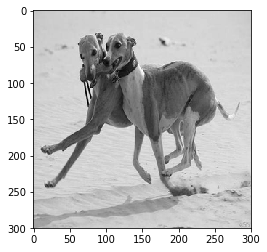

In [55]:
plt.imshow(test_data[10][0], cmap = 'gist_gray')
plt.show()

In [56]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

99.16349292179895
